# Location for opening a restaurant chain in London

To open a restaurant in one of the safer districts of London.

1.The task at hand

A restaurant owner wants to open a chain of restaurants in the City of London. The restaurant owner has asked the advice to carry out research using the designs final one of the safest district of London. A safe district is likely to house generally the more affluent in society. This might mean less chances of vandalism and store break-ins for the business.  relative selling prices of houses also being moderately priced. This means the social attitudes and buying power of this neighbourhood is likely going to be high. This might be more customers will be visiting the restaurant and hence therefore more business for the restaurant owner.



Criteria

The crime statistics dataset with the breakdown of crimes in each of the boroughs will be looked at. This will be a period up till 2016. This will give a good indication of the trend, even though we are in 2020.
The research aims to get the safest burrow in London exploring the number of crimes in each of the neighbourhood. As a means of statistical inference ,k-means clustering will be actually used to study the data to give an idea of the neigbourhood to take into account the nature of the neighbourhood for the business to thrive.


# Data Acquisition and cleaning (Details in the attached document)

2.1 Data Sources and consists of the following:

i) Section 1: London crime data

ii)Section 2: List of London boroughs

iii) Section 3: Wikipedia, list of neighbourhoods in the Royal Borough of Kingston.

#  Data cleaning

Data downloaded or scraped from multiple sources were combined into one table.

The London crime data is accessed from Kaggle and this is then uploaded to Amazon S3 bucket.

The sequence ois provided in the following sections:

Based on our problem, the factors that will influence our decsion to open a restaurant is as follows:

A) The general safety of the borough: taking into account the total number of crimes committed and hence the notion of saftey in the borough

B) The other amenities that might be available in the borough which might make the restaurant business strive, such as transportation links, other businesses, general neighborhood etc.

# Section 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016

London Crime Data

About the data

soa_code: code for Lower Super Output Area in Greater London.

borough: Common name for London borough.

major_category: High level categorization of crime

minor_category: Low level categorization of crime within major category.

value: monthly reported count of categorical crime in given borough

year: Year of reported counts, 

month: Month of reported counts, 1-12

Data set URL: https://www.kaggle.com/jboysen/london-crime


Getting necessary libraries

In [6]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

Section 1: Preprocessing a real world data set from Kaggle showing the London Crimes 

Defining Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'PEXODTWMZUARPIF4HRTIYXAXEBHQOLXGFYGKZN0ITW5DZBJ5' # your Foursquare ID
CLIENT_SECRET = 'GKNBXK0IJOTZUVPGHZK3HMUQ1EEMFB1IZOBUYGL14EXHVBLO' # your Foursquare Secret

VERSION = '20200612'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PEXODTWMZUARPIF4HRTIYXAXEBHQOLXGFYGKZN0ITW5DZBJ5
CLIENT_SECRET:GKNBXK0IJOTZUVPGHZK3HMUQ1EEMFB1IZOBUYGL14EXHVBLO


In [8]:
!wget -O london_crime_by_lsoa.csv https://courseraanindya.s3.amazonaws.com/london_crime_by_lsoa.csv

--2020-06-18 14:38:23--  https://courseraanindya.s3.amazonaws.com/london_crime_by_lsoa.csv
Resolving courseraanindya.s3.amazonaws.com (courseraanindya.s3.amazonaws.com)... 52.217.12.132
Connecting to courseraanindya.s3.amazonaws.com (courseraanindya.s3.amazonaws.com)|52.217.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932802830 (890M) [text/csv]
Saving to: ‘london_crime_by_lsoa.csv’

100%[======================================>] 932,802,830 47.2MB/s   in 18s    

2020-06-18 14:38:42 (49.1 MB/s) - ‘london_crime_by_lsoa.csv’ saved [932802830/932802830]



Reading the dataset

In [9]:
# Read in the data 
df = pd.read_csv("london_crime_by_lsoa.csv")

In [10]:
# View the top rows of the dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Accessing the most recent crime rates (lates value being 2016, but it will still give a trend for 2020)

In [11]:

# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['year'] != 2016], inplace = True)

# Removing all the entires where crime values are null  
df = df[df.value != 0]

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)



In [12]:

# Shape of the data frame
df.shape



(392042, 7)

In [13]:
# View the top of the dataset 
df.head()



,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


Change the column names

In [14]:
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()



,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [15]:
# View the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
LSOA_Code         392042 non-null object
Borough           392042 non-null object
Major_Category    392042 non-null object
Minor_Category    392042 non-null object
No_of_Crimes      392042 non-null int64
Year              392042 non-null int64
Month             392042 non-null int64
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


Total number of crimes in each Borough

In [16]:
df['Borough'].value_counts()

Lambeth                   17605
Southwark                 16560
Croydon                   16254
Newham                    15622
Ealing                    15284
Tower Hamlets             15219
Brent                     14980
Barnet                    14668
Hackney                   14392
Lewisham                  14235
Haringey                  14202
Enfield                   13658
Wandsworth                13498
Westminster               13383
Islington                 13116
Greenwich                 12750
Camden                    12632
Hillingdon                12417
Hounslow                  12316
Waltham Forest            12121
Bromley                   11980
Redbridge                 11490
Hammersmith and Fulham    10281
Barking and Dagenham       9784
Havering                   9699
Kensington and Chelsea     9653
Harrow                     8257
Bexley                     8245
Merton                     8223
Richmond upon Thames       7199
Sutton                     6823
Kingston

The total crimes per major category

In [17]:
df['Major_Category'].value_counts()

Theft and Handling             129159
Violence Against the Person    123050
Criminal Damage                 48584
Burglary                        43020
Drugs                           21782
Robbery                         14889
Other Notifiable Offences       11558
Name: Major_Category, dtype: int64

Pivoting the table to view the no. of crimes for each major category in each Borough

In [18]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
Major_Category       Violence Against the Person  
Borough                                           
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

In [19]:

# Reset the index
London_crime.reset_index(inplace = True)



In [20]:

# Total crimes per Borough
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)



Borough No_of_Crimes                        \
Major_Category                             Burglary Criminal Damage Drugs   
0                 Barking and Dagenham         1287            1949   919   
1                               Barnet         3402            2183   906   
2                               Bexley         1123            1673   646   
3                                Brent         2631            2280  2096   
4                              Bromley         2214            2202   728   
5                               Camden         2652            1935  1493   
6                       City of London            2               2    10   
7                              Croydon         2738            3219  1367   
8                               Ealing         2492            2562  1355   
9                              Enfield         2541            2136  1063   
10                           Greenwich         1780            2476   867   
11                             Hackney         2719            1981  1353   
12              Hammersmith and Fulham         1531            1408  1321   
13                            Haringey         2474            2233  1540   
14                              Harrow         1994            1212   473   
15                            Havering         1826            1804   718   
16                          Hillingdon         2229            2470  1042   
17                            Hounslow         1808            2213  1086   
18                           Islington         2051            1903  1777   
19              Kensington and Chelsea         1449            1051  1680   
20                Kingston upon Thames          879            1054   743   
21                             Lambeth         3087            2764  2738   
22                            Lewisham         2071            2351  1617   
23                              Merton         1419            1418   466   
24                              Newham         2115            2496  1684   
25                           Redbridge         1997            1650  1017   
26                Richmond upon Thames         1359            1148   320   
27                           Southwark         2946            2621  1838   
28                              Sutton         1233            1316   461   
29                       Tower Hamlets         2794            2357  1629   
30                      Waltham Forest         1873            1989  1042   
31                          Wandsworth         2351            1836   870   
32                         Westminster         3218            2179  2049   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   
5                                    490     899              14088   
6                                      6       4                129   
7                                    718    1139               9229   
8                                    613     669              10040   
9                                    492     807               8037   
10                                   521     486               8010   
11                                   499    1030              11851   
12                                   474     397               8925   
13                                   551    1248              10554   
14                                   267     377               4537   
15                                   389     311               5919   
16                                  1305     420         


Removing the multi index so that it will be easier to merge

In [21]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164



Renaming the columns

In [22]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [23]:
# Shape of the data set 
London_crime.shape

(33, 9)

In [24]:
# View the Columns in the data frame
# London_crime.columns.tolist()

# Section 2: Scraping additional information of the different Boroughs in London from  Wikipedia

Using Beautiful soup to scrap the latitude and longitiude of the boroughs in London

URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [25]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fc174fc5-22d5-4a57-8fbf-97fd09cfffbe","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of 

Converting the table into a data frame

In [26]:
London_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')

In [27]:
London_table


[                            Borough     Inner Status  \
 0     Barking and Dagenham [note 1]       NaN    NaN   
 1                            Barnet       NaN    NaN   
 2                            Bexley       NaN    NaN   
 3                             Brent       NaN    NaN   
 4                           Bromley       NaN    NaN   
 5                            Camden       NaN    NaN   
 6                           Croydon       NaN    NaN   
 7                            Ealing       NaN    NaN   
 8                           Enfield       NaN    NaN   
 9                Greenwich [note 2]  [note 3]  Royal   
 10                          Hackney       NaN    NaN   
 11  Hammersmith and Fulham [note 4]       NaN    NaN   
 12                         Haringey  [note 3]    NaN   
 13                           Harrow       NaN    NaN   
 14                         Havering       NaN    NaN   
 15                       Hillingdon       NaN    NaN   
 16                         Hou

In [28]:
df=London_table[0]

In [29]:
df


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


# Feature selection

After data cleaning: The features of categories of crime, borough, number are kept. The previous years, months were dropped as they did not add vlue to the findings

# Methodology



The methodology in this project consists of two parts:

1. Exploratory Data Analysis: Visualise the crime rates in the London boroughs for chain restaurant owners to identify the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood

2. Modelling: To help chain restaurant owners to find other amenities in the safest boroughs. We will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar amenities. This is so that chain restaurant owners can look at other amenities that go hand in hand whilst running a food business, such as transport and other businesses in the area.

# Exploratory Data Analysis
 


Descriptive statistics of the data

In [30]:


London_crime.describe()



,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970
std,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749
min,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000
25%,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000
50%,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000
75%,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000


In [31]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


In [32]:


London_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = London_crime.head() 
df_top5



,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,3218,2179,2049,708,1822,27520,10834,48330
21,Lambeth,3087,2764,2738,635,1196,13155,10496,34071
27,Southwark,2946,2621,1838,494,1317,12946,9474,31636
24,Newham,2115,2496,1684,713,1472,11964,9646,30090
29,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253


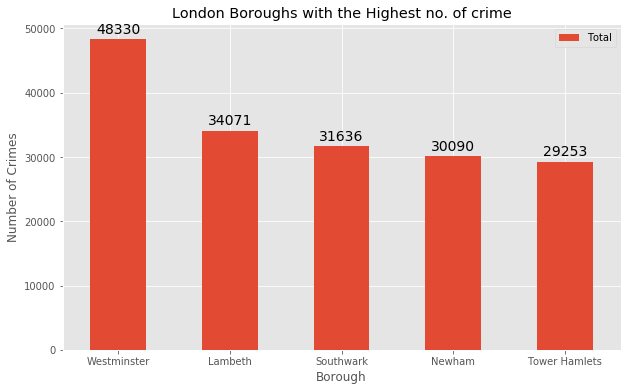

In [33]:

df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()




It is perhaps best to stay away from the borough of 'Westminister'

In [35]:
London_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = London_crime.head() 
df_bot5

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,2,2,10,6,4,129,25,178
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983
28,Sutton,1233,1316,461,253,165,3516,3714,10658
26,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074
23,Merton,1419,1418,466,249,283,4894,4026,12755


Visualize the five boroughs with the least number of crimes

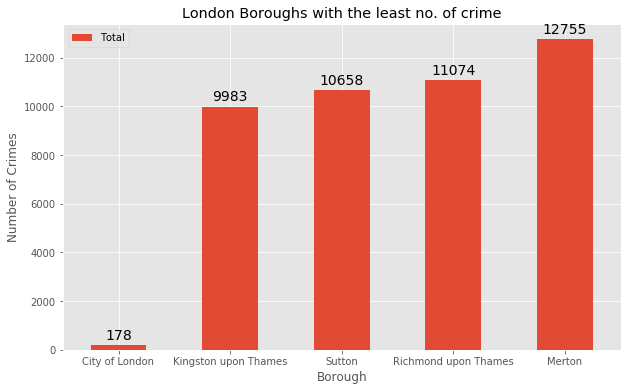

In [36]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

Kingston upon Thames is the safest borough

Text(0.5, 0.98, 'Number of crimes per Borough')

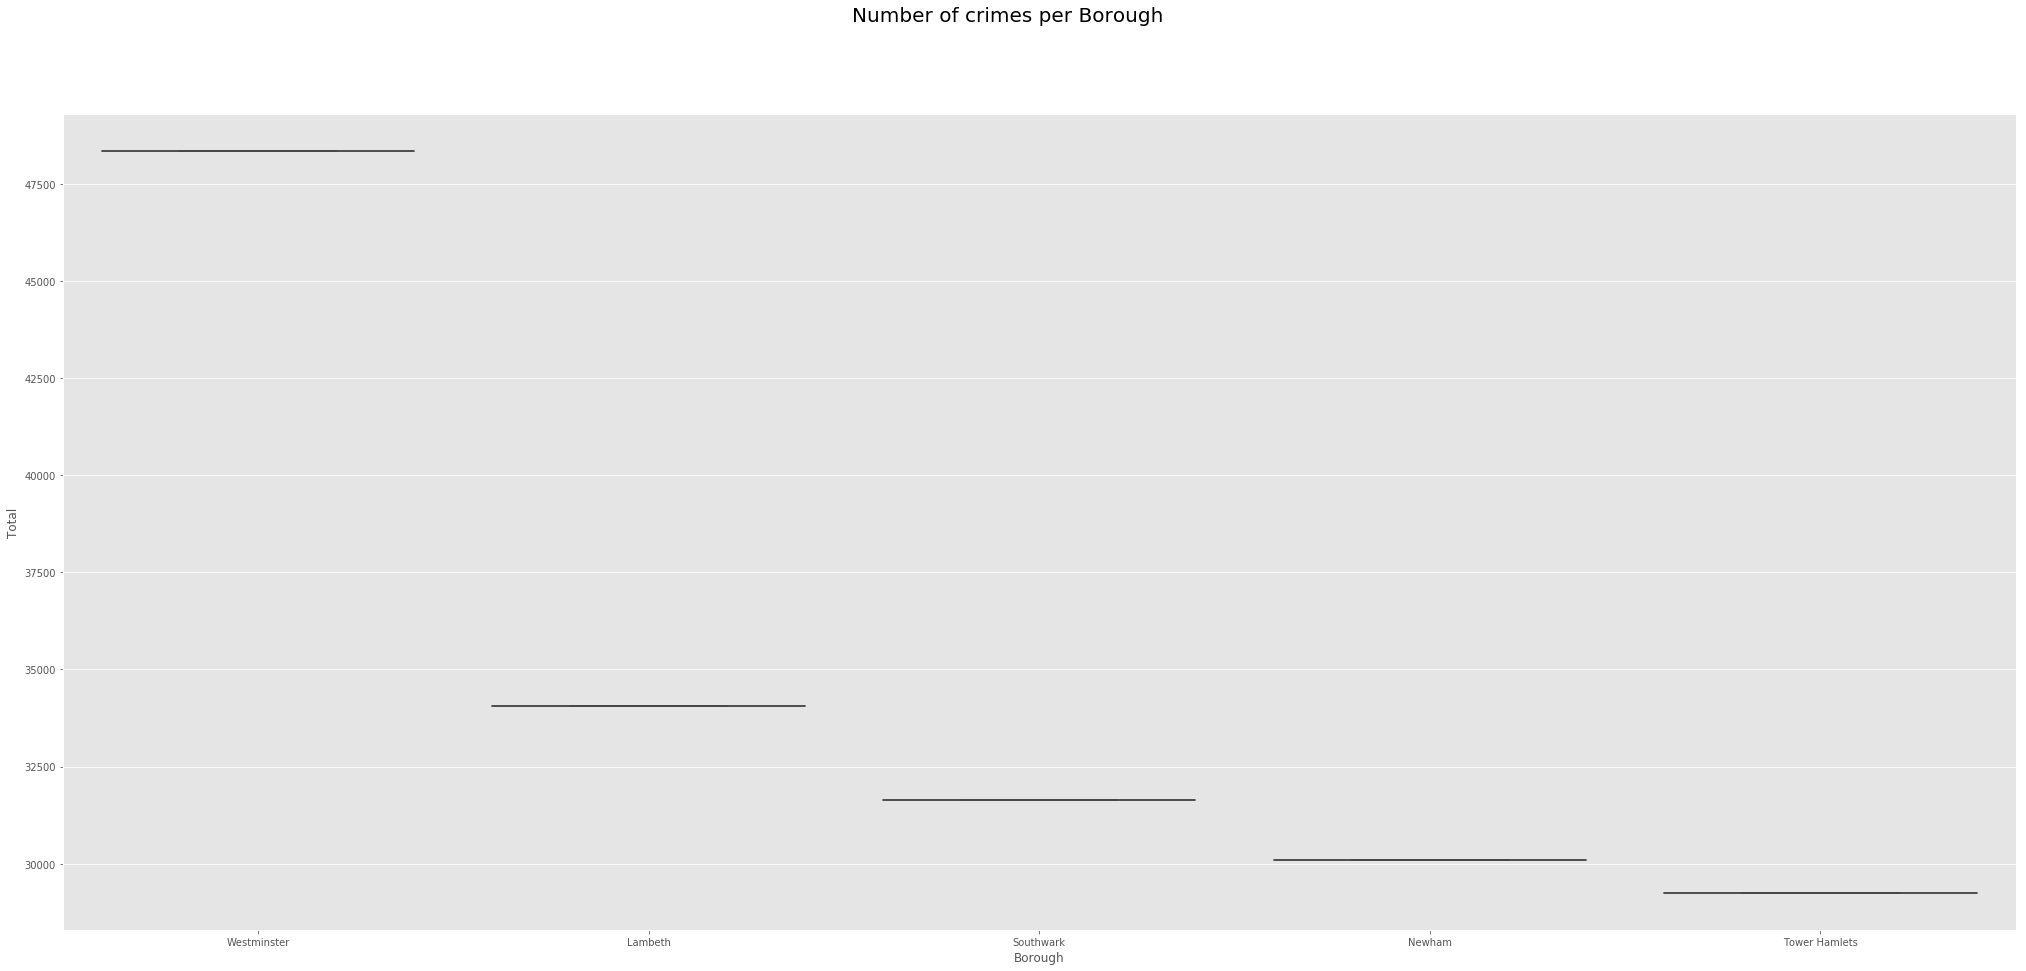

In [38]:
import seaborn as sns


#box plot Number of ccrimes per borough 
from matplotlib import pyplot as plt

ax = sns.boxplot(x="Borough", y="Total", data=df_top5)
fig = plt.gcf()
fig.set_size_inches(35, 15)
fig.suptitle('Number of crimes per Borough', fontsize=20)



In [39]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


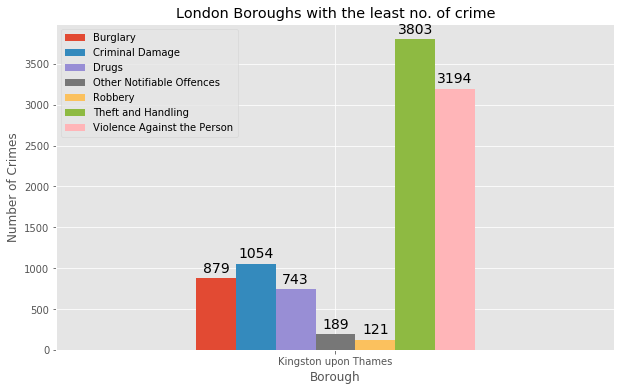

In [40]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

Above:Visualizing different types of crimes in the borough 'Kingston upon Thames'

We had previously  concluded that Kingston upon Thames is the safest borough when compared to the other boroughs in London

# Section  3: Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates

The list of Neighborhoods in the Royal Borough of Kingston upon Thames was found on a wikipedia page: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames

In [42]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [48]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [49]:


df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig



,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [50]:


address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


In [51]:


# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon



# Modelling

Finding all the venues within a 500 meter radius of each neighborhood.

Perform one hot ecoding on the venues data.

Grouping the venues by the neighborhood and calculating their mean.

Performing a K-means clustering (Defining K = 5)

Create a function to extract the venues from each Neighborhood

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:

kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                            )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [54]:


print(kut_venues.shape)
kut_venues.head()



(168, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Berrylands,51.393781,-0.284802,Rob Taylor's Ultimate Gay Sauna,51.390022,-0.284894,Sauna / Steam Room
4,Berrylands,51.393781,-0.284802,SK Superstores,51.389901,-0.283278,Convenience Store


In [55]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,5,5,5,5,5,5
Canbury,14,14,14,14,14,14
Chessington,1,1,1,1,1,1
Coombe,1,1,1,1,1,1
Hook,4,4,4,4,4,4
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4


In [56]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 70 uniques categories.


One hot encoding¶

URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [57]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [58]:


kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped



,Neighborhood,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chessington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Coombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,Hook,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kingston upon Thames,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.033333
7,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Motspur Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,New Malden,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
kut_grouped.shape

(15, 71)

In [60]:


num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----Berrylands----
                  venue  freq
0              Bus Stop   0.2
1  Gym / Fitness Center   0.2
2     Convenience Store   0.2
3    Sauna / Steam Room   0.2
4                  Park   0.2


----Canbury----
                  venue  freq
0                   Pub  0.29
1           Supermarket  0.07
2  Gym / Fitness Center  0.07
3     Fish & Chips Shop  0.07
4                  Park  0.07


----Chessington----
                        venue  freq
0  Construction & Landscaping   1.0
1            Asian Restaurant   0.0
2                         Pub   0.0
3                       Plaza   0.0
4                    Platform   0.0


----Coombe----
              venue  freq
0          Tea Room   1.0
1  Asian Restaurant   0.0
2            Market   0.0
3          Platform   0.0
4       Pizza Place   0.0


----Hook----
               venue  freq
0             Bakery  0.25
1  Indian Restaurant  0.25
2  Fish & Chips Shop  0.25
3        Supermarket  0.25
4   Asian Restaurant  0.00


----Kingston 

Create a data frame of the venues

Function to sort the venues in descending order.

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [63]:


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Sauna / Steam Room,Gym / Fitness Center,Park,Bus Stop,Convenience Store,Turkish Restaurant,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market
1,Canbury,Pub,Café,Plaza,Fish & Chips Shop,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Park,Hotel
2,Chessington,Construction & Landscaping,Food,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Convenience Store
3,Coombe,Tea Room,Turkish Restaurant,Fish & Chips Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market,Fast Food Restaurant,Food
4,Hook,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Food,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market,Fast Food Restaurant


# Clustering similar neighborhoods together using k - means clustering

In [64]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 4, 3, 0, 2, 1, 1, 1, 0], dtype=int32)

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,1,Sauna / Steam Room,Gym / Fitness Center,Park,Bus Stop,Convenience Store,Turkish Restaurant,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market
1,Canbury,Kingston upon Thames,51.417499,-0.305553,1,Pub,Café,Plaza,Fish & Chips Shop,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Park,Hotel
2,Chessington,Kingston upon Thames,51.358336,-0.298622,4,Construction & Landscaping,Food,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Convenience Store
3,Coombe,Kingston upon Thames,51.419450,-0.265398,3,Tea Room,Turkish Restaurant,Fish & Chips Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market,Fast Food Restaurant,Food
4,Hook,Kingston upon Thames,51.367898,-0.307145,0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Food,Deli / Bodega,Department Store,Dry Cleaner,Farmers Market,Fast Food Restaurant


In [66]:


kut_merged.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            15 non-null int32
1st Most Common Venue     15 non-null object
2nd Most Common Venue     15 non-null object
3rd Most Common Venue     15 non-null object
4th Most Common Venue     15 non-null object
5th Most Common Venue     15 non-null object
6th Most Common Venue     15 non-null object
7th Most Common Venue     15 non-null object
8th Most Common Venue     15 non-null object
9th Most Common Venue     15 non-null object
10th Most Common Venue    15 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 1.8+ KB


In [67]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [68]:
kut_merged.shape

(15, 15)

In [69]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [70]:


kut_merged.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            15 non-null int64
1st Most Common Venue     15 non-null object
2nd Most Common Venue     15 non-null object
3rd Most Common Venue     15 non-null object
4th Most Common Venue     15 non-null object
5th Most Common Venue     15 non-null object
6th Most Common Venue     15 non-null object
7th Most Common Venue     15 non-null object
8th Most Common Venue     15 non-null object
9th Most Common Venue     15 non-null object
10th Most Common Venue    15 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 1.9+ KB


# Visualize the clusters

In [71]:


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters



Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster.

# Analysis 

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

Examine the first cluster

In [75]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,0,Grocery Store,Sandwich Place,Bar,Soccer Field,Department Store,Discount Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,0,Grocery Store,Pub,Garden Center,Restaurant,Fish & Chips Shop,Deli / Bodega,Department Store,Discount Store,Farmers Market,Fast Food Restaurant
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,0,Construction & Landscaping,Grocery Store,Food,Train Station,Bagel Shop,Department Store,Golf Course,Gift Shop,German Restaurant,Gastropub
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,0,Grocery Store,Restaurant,Pharmacy,Pizza Place,Train Station,Hotel,Indian Restaurant,Italian Restaurant,Discount Store,Coffee Shop




The cluster one is the biggest cluster with 9 of the 15 neighborhoods in the borough Kingston upon Thames. Upon closely examining these neighborhoods we can see that the most common venues in these neighborhoods are Stores, Pubs, Restaurants and Train Station.


Examine the second cluster

In [76]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1,Construction & Landscaping,Food,Deli / Bodega,Department Store,Discount Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Grocery Store


The second cluster has one neighborhood which consists of Venues such as Construction, Food Shops and Departmental Stores.

Examine the third cluster

In [77]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Turkish Restaurant,Food,Department Store,Discount Store,Farmers Market,Fast Food Restaurant
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Gym,Gastropub,Office,Sushi Restaurant,Supermarket,Bar,Korean Restaurant,Indian Restaurant,Fast Food Restaurant,Department Store


The third cluster neighborhoods which consists of Venues such as Gyms, Pubs and Restaurants


Examine the fourth cluster¶

In [78]:


kut_merged[kut_merged['Cluster Labels'] == 3]



,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,3,Gym / Fitness Center,Park,Bus Stop,Turkish Restaurant,Fish & Chips Shop,Department Store,Discount Store,Farmers Market,Fast Food Restaurant,Food
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,3,Gym,Park,Bus Stop,Soccer Field,Fish & Chips Shop,Department Store,Discount Store,Farmers Market,Fast Food Restaurant,Food


The fourth cluster has two neighborhood in it, this has common venues such as Train Stations, Pubs, Restaurants, Electronics Stores etc.

Examine the fifth cluster

In [80]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,4,Pub,Park,Café,Supermarket,Spa,Gym / Fitness Center,Shop & Service,Fish & Chips Shop,Plaza,Hotel
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,4,Café,Pub,Burger Joint,Sushi Restaurant,Coffee Shop,Turkish Restaurant,French Restaurant,Gym / Fitness Center,Gift Shop,German Restaurant
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,4,Indian Restaurant,Italian Restaurant,Food,Platform,Pub,Japanese Restaurant,Hotel,Coffee Shop,Hardware Store,Café
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,4,Indian Restaurant,Coffee Shop,Pub,Café,Gym,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop,Restaurant,Italian Restaurant
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,4,Coffee Shop,Pub,Pharmacy,Grocery Store,Italian Restaurant,Breakfast Spot,French Restaurant,Train Station,Gym / Fitness Center,Hotel



The fifth cluster has two neighborhood which consists of Restaurants, Coffee Shops, Pubs.


# Results and Discussion

The aim of the project was to help business investors who would like to invest in chain of restaurants in the safest borough of London. They would also like to examine the neighbourhoods giving them the idea whether it is a sustainable for restaurant business. This could be looking at transport links and the nature of other businesses in the area.
If a business owner is looking for good connectivity then cluster 1 and cluster 4 would be the choice.
If a business owner is looking for the presence of other business in the area, including pubs restaurants and coffee shops then clusters 2, 3, 5 would be the ideal choice.


# Conclusion

This project helps to get holistic view into the investment decisions that might be critical before investing in a hospitality business. Not only the venue has got to be safe with regards to crime, it also has to be a place where the potential customers would be able to visit easily. It should also mean the staff work in the restaurant should also be able to commute and get to work in the easiest possible manner. This project has given the options restaurant owner in terms of the safest boroughs in London and also the location details where are prospective restaurant might thrive the City of London.